In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append('..')

In [3]:
from utils import log_parser, csv_parser

In [4]:
sorted([f for f in os.listdir('../logs') if f != '.DS_Store'])

['SuperMarioBrosNoFrameskip-1-1-v0']

In [5]:
ENV_NAME = 'SuperMarioBrosNoFrameskip-1-1-v0'

In [6]:
LOG_DIR = os.path.join('..', 'logs', ENV_NAME)

In [7]:
assert os.path.exists(LOG_DIR), 'File not found'

In [8]:
log_files = [f for f in os.listdir(LOG_DIR) if f != '.DS_Store']

big_mess False 514


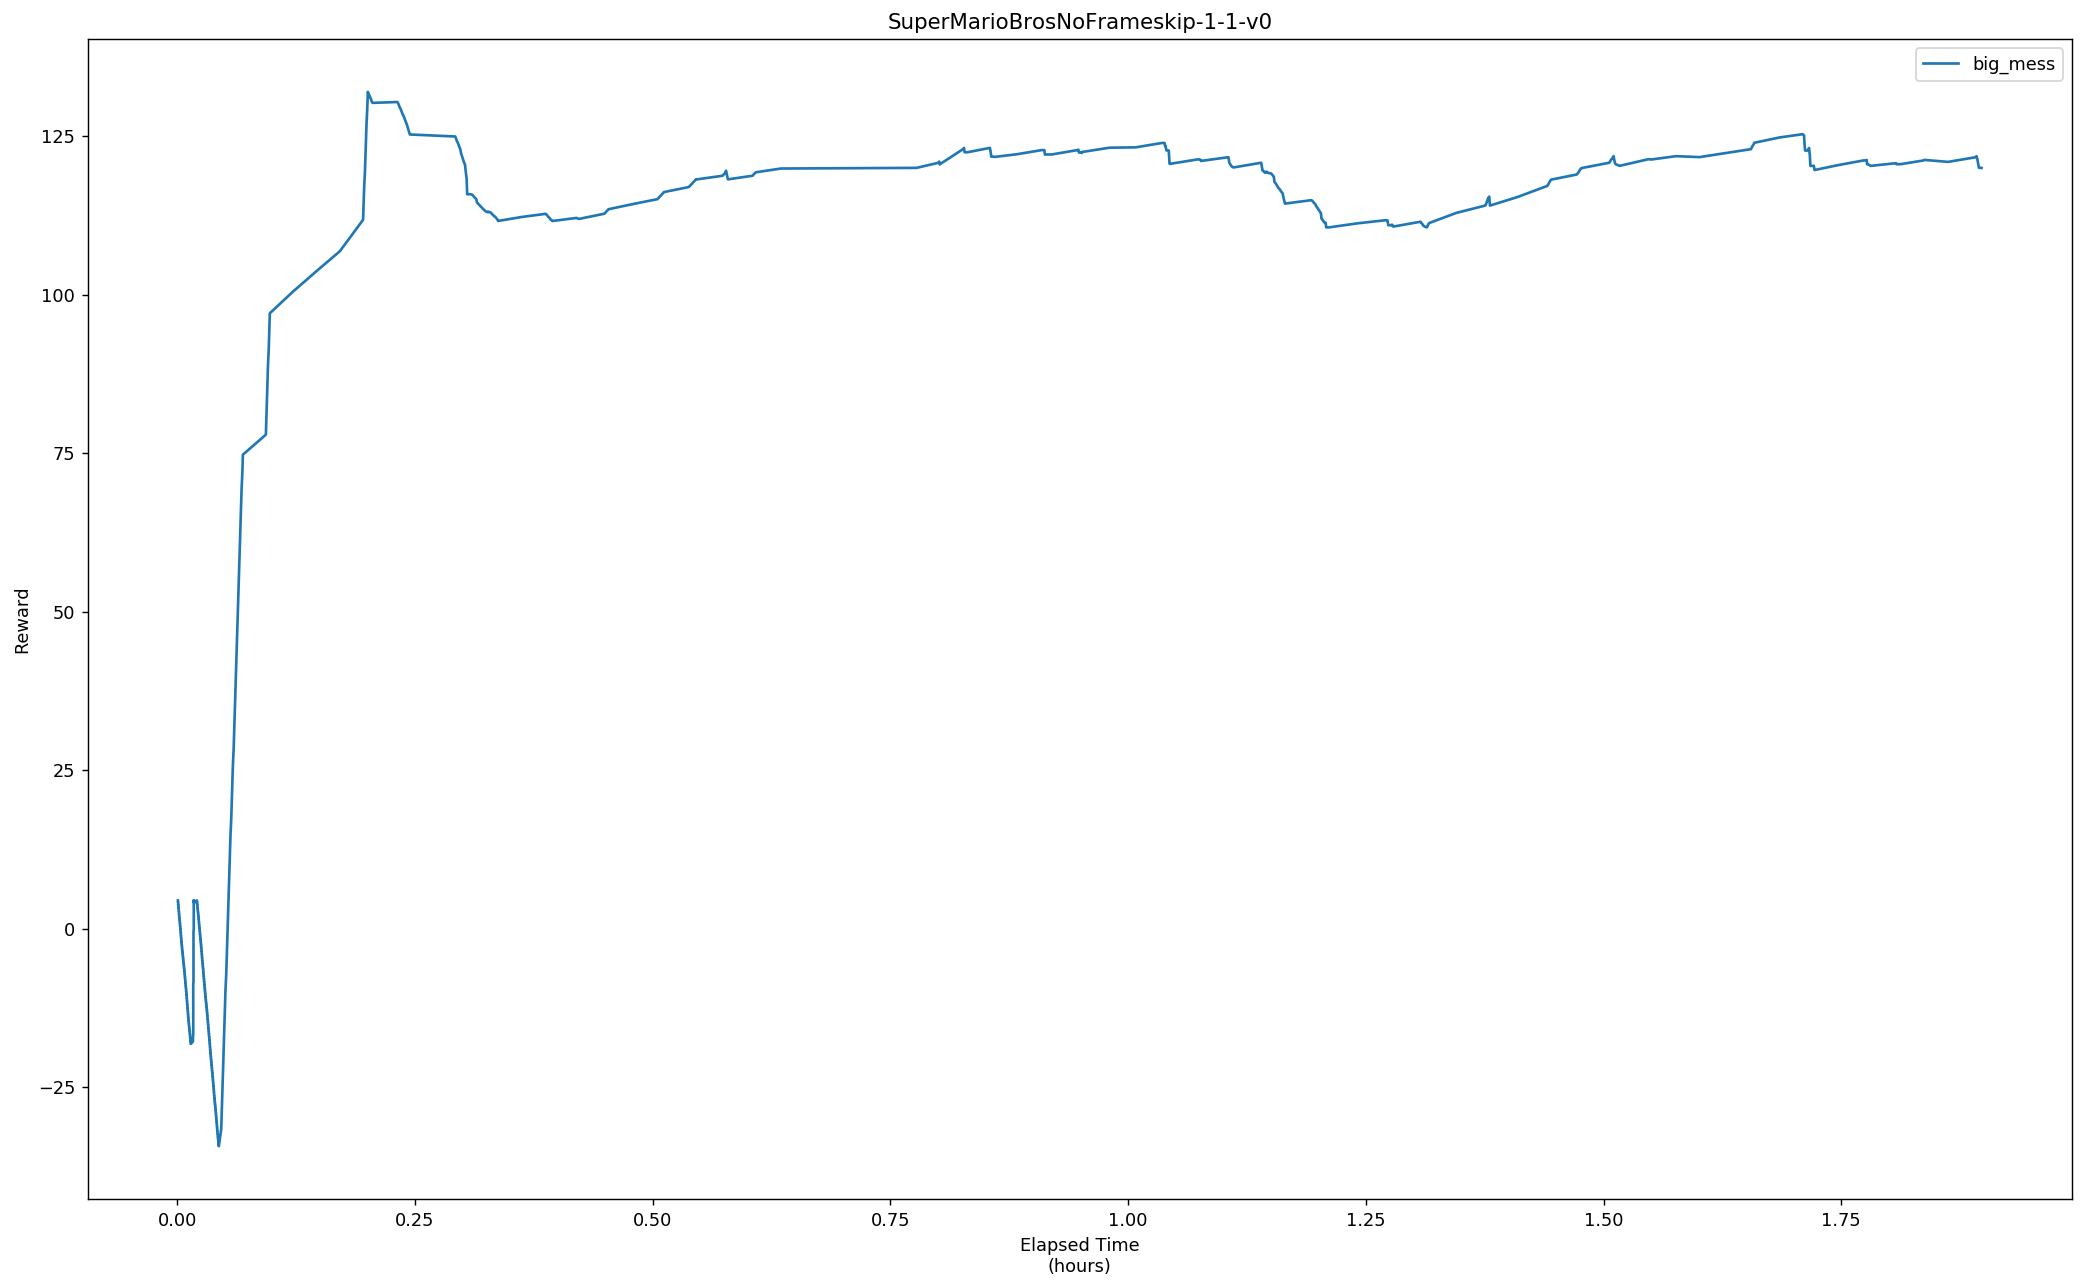

In [9]:
plt.figure(figsize=(20, 12), dpi=128)
for log in log_files:
    log_path = os.path.join(LOG_DIR, log)
    df = log_parser(log_path)
                
    model_id = df['id'].iloc[0]
    level_complete = df['flag_get'].any()
    episodes = df['done'].sum()

    df = df.set_index('log_time')
    df.index = (df.index - df.index[0]).seconds

    print(model_id, level_complete, episodes)
    plt.plot(
        (df.index / 3600),
        df['reward'].rolling(60).mean(),
        label=model_id,
    )


plt.title(ENV_NAME)
plt.ylabel('Reward')
plt.xlabel('Elapsed Time\n(hours)')
plt.legend();

big_mess False 514


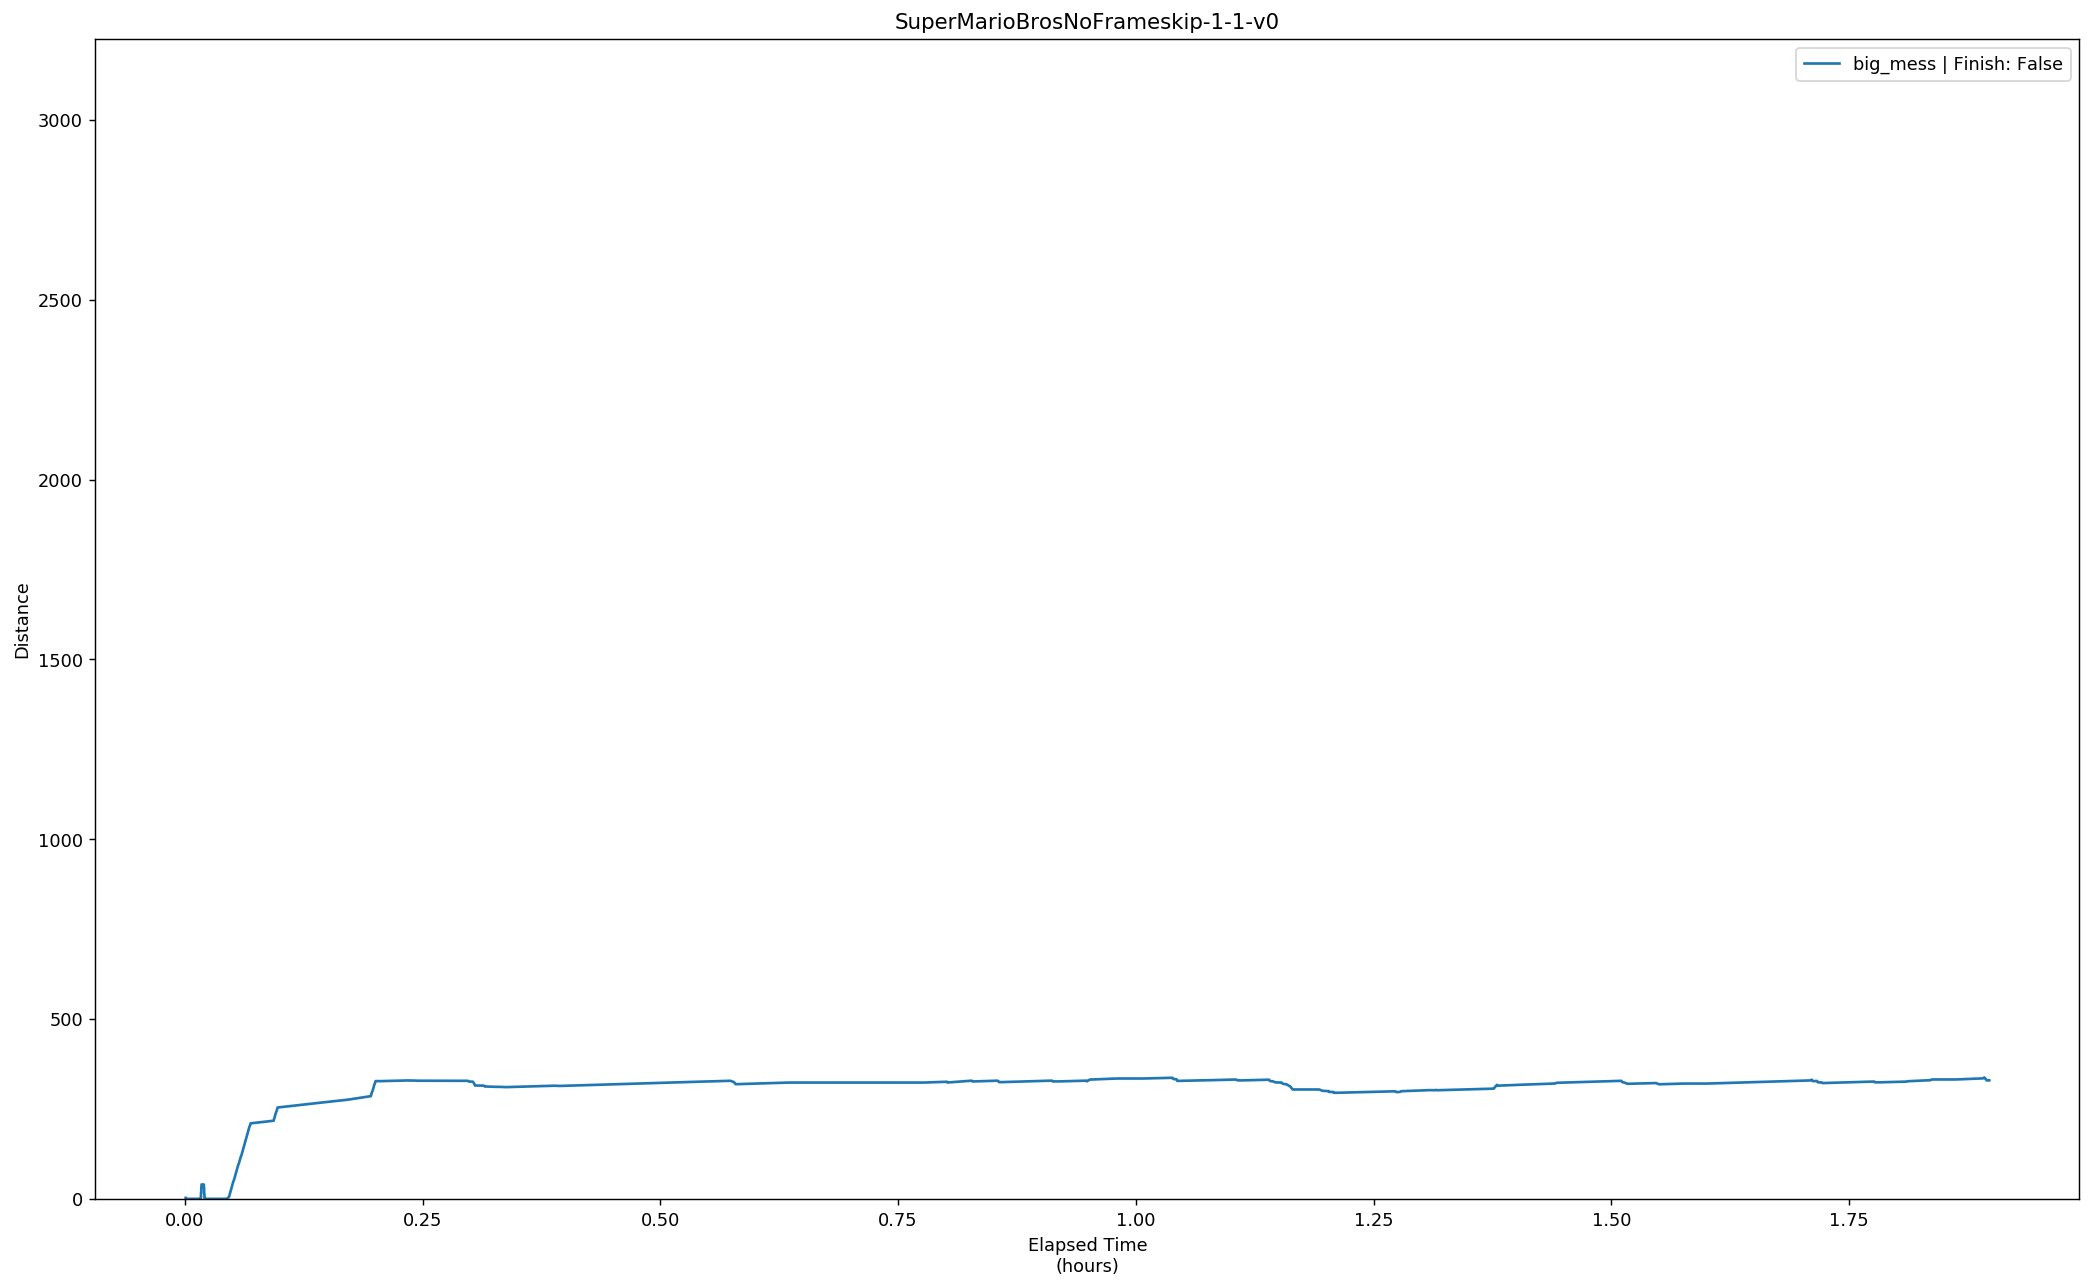

In [10]:
plt.figure(figsize=(20, 12), dpi=128)
for log in log_files:
    log_path = os.path.join(LOG_DIR, log)
    df = log_parser(log_path)
                
    model_id = df['id'].iloc[0]
    level_complete = df['flag_get'].any()
    episodes = df['done'].sum()

    df = df.set_index('log_time')
    df.index = (df.index - df.index[0]).seconds

    print(model_id, level_complete, episodes)
    plt.plot(
        (df.index / 3600),
        df['x_position'].rolling(60).mean(),
        label=f"{model_id} | Finish: {level_complete}"
    )


plt.ylim(0, 3225)
plt.title(ENV_NAME)
plt.ylabel('Distance')
plt.xlabel('Elapsed Time\n(hours)')
plt.legend();